In [1]:
import explore
import pandas as pd

In [2]:
users_df, channels_df = explore.load_users_and_channels()
channel_directories = explore.get_channel_directories()
msg_keys, msg_types, msg_example, messages = explore.scan_msg_types(channel_directories, channels_df)

m_df = pd.DataFrame(messages)


CAW4V8SS0 staff
C670P2WRM website_team
C7TP5RTMX unethical-hacking
C0H44FDMZ psi
C04K2UW92 bio
C04K30RL4 telehealth
C48H827M4 tutorials
C7U4F8ZN3 m
C1VF66E7J build-direct
C093KCU80 permission
C0FBDD7D2 bookmarks
CAPUA0DJP drone-mvp
C082G7W78 opencog
C1L0GCKBJ h-plus
C58GJ0BQD corto
C04KQCEL9 teaching-tablet
C23U8N6QN contender
C0GSN007M announce-updownload
C7AH6M146 singnet
C08PBA9DF hersheys
C051V9SDF ai-accounting
C04J4FX9A general
CAG9H6F6D as-moses
C0FG1PYAF bossrt
C11DURGHF hansonrobotics
C28F8V9RR icog-acc
CAR37GBK9 self-driving-car-mvp
C3UBR4BGS lovingais
C04KQC3NZ robot-soccer
C04J4FX9L random
C1Q818VAR mindcloud
C451AFG23 uarc
C04JNGQUS aon
C8RANP917 dr-roboto
C45JC19HP robocup
C135G8YF6 saturday-class
C0H65910T simulation-projects
C3LE6P82Y emotion-rec
C05194FKP -mindcloud-
C04KVGCT5 3d-print
C4R7C23LG amharic-nlp
CAHKPEW2F team-1
C7T7A27GR ethical_hacking
C0A729Q7Q icog-students
C06MRHMPA icog-makers


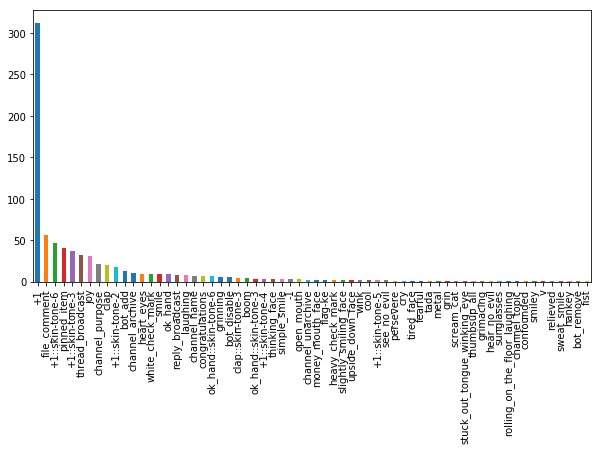

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure();

# would be nice to make emoji reactions rendered.
# this json has that mapping: https://raw.githubusercontent.com/iamcal/emoji-data/master/emoji_pretty.json
# found via https://aaronparecki.com/2017/02/05/8/day-47-slack-emoji
# See this issue for getting emojis rendering:
# https://github.com/matplotlib/matplotlib/issues/12830

m_df[~m_df.subtype.isin(['bot_message', 'channel_join', 'channel_leave'])].subtype.value_counts().plot(kind='bar');

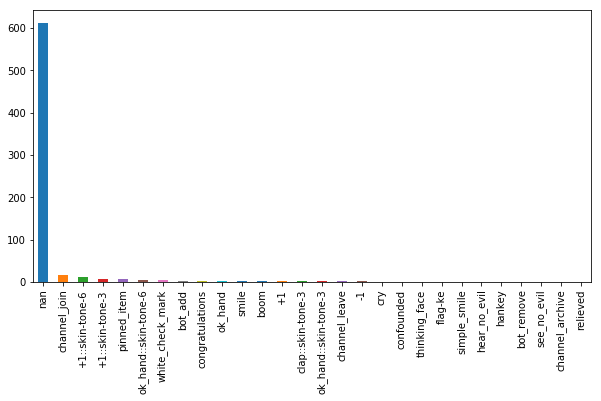

In [20]:
m_df[m_df.user == users_df.loc[4].id].subtype.value_counts(dropna = False).plot(kind='bar')

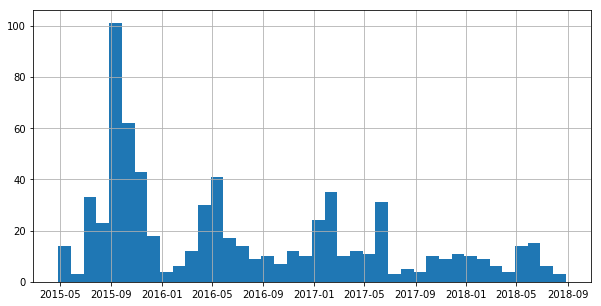

In [96]:
m_df[m_df.user == users_df.loc[4].id].ts.hist(bins=40)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f88b946ba90>,
      dtype=object)

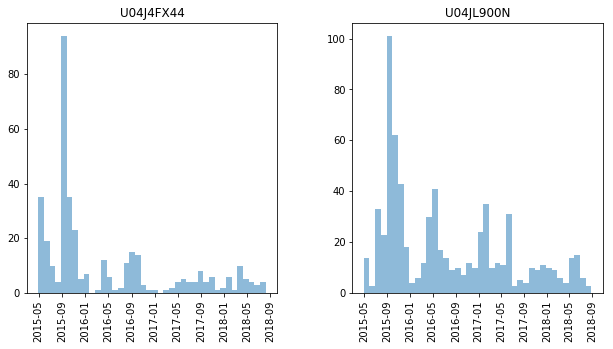

In [95]:
m_view = m_df[m_df.user.isin([users_df.loc[4].id, users_df.loc[0].id])]
m_view.ts.hist(bins=40, by=m_view.user, alpha=0.5)

user
U04J4FX44    AxesSubplot(0.125,0.125;0.775x0.755)
U04JL900N    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ts, dtype: object

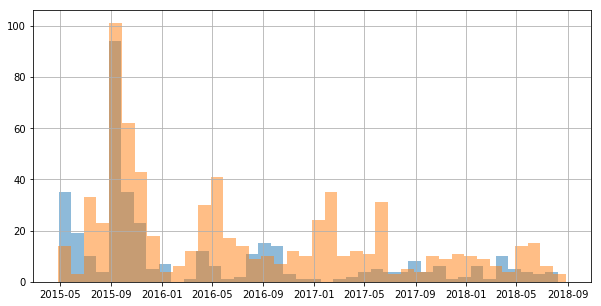

In [94]:
m_df[m_df.user.isin([users_df.loc[4].id, users_df.loc[0].id])].groupby('user').ts.hist(bins=40, alpha=0.5)

telehealth


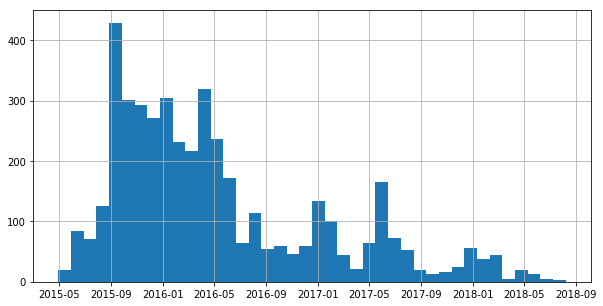

In [100]:
i = 4
print(channels_df.loc[i]['name'])
m_df[m_df.channel_id == channels_df.loc[i].id].ts.hist(bins=40)

robot-soccer


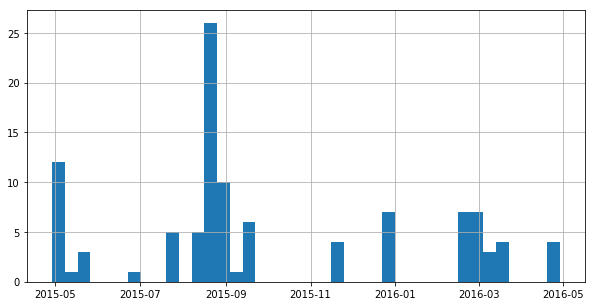

In [101]:
i = 5
print(channels_df.loc[i]['name'])
m_df[m_df.channel_id == channels_df.loc[i].id].ts.hist(bins=40)

In [ ]:
# from https://stackoverflow.com/a/25539531/272238

import numpy as np
#import seaborn
#seaborn.set(style='ticks')

fig, ax = plt.subplots()

a_df = m_df[m_df.user.isin([users_df.loc[4].id])]
b_df = m_df[~m_df.user.isin([users_df.loc[4].id])]

a_heights, a_bins = np.histogram(a_df.ts)
b_heights, b_bins = np.histogram(b_df.ts, bins=a_bins)

width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88bb060c88>]],
      dtype=object)

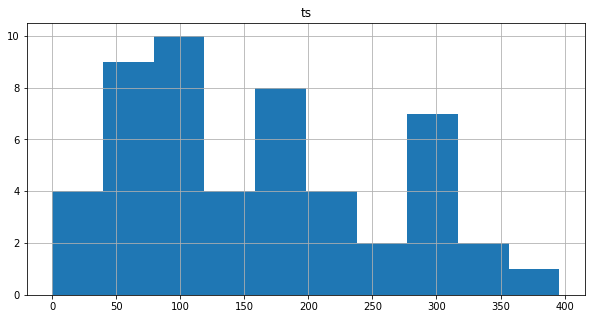

In [72]:
#fig, ax = plt.subplots()

# work out the date ranges first, then pass to cut

dr = pd.date_range(m_df.ts.min(), freq='1w', periods=52)
bins_str = dr.astype(str).values
x = m_df.groupby(pd.cut(m_df.ts, dr, labels=bins_str[:-1])).agg({'ts': 'count'})

print()
#print(x)
#bins = x[1]
a_df = m_df[m_df.user.isin([users_df.loc[4].id])]
b_df = m_df[~m_df.user.isin([users_df.loc[4].id])]

#a_df.ts.hist(bins=bins)
#b_heights, b_bins = np.histogram(b_df.ts, bins=a_bins)

#width = (a_bins[1] - a_bins[0])/3

x.hist()
#ax.bar(bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
#ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

In [104]:
import networkx as nx

G=nx.DiGraph()
G.add_nodes_from(users_df.id)

In [106]:
messages[0]

{'id': 0,
 'type': 'message',
 'subtype': 'channel_join',
 'ts': Timestamp('2018-05-25 14:40:34.000009060'),
 'channel_id': 'CAW4V8SS0',
 'channel_name': 'staff',
 'text': '<@U04JT3ZR3> has joined the channel',
 'user': 'U04JT3ZR3'}